**2D Convlution Theory Exercise**
1. Get any image I. Create a binary black image W of the same size of I with a small white rectangle in the middle.
2. Apply DFT on I, let the result be F
3. Calculate the point-wise multiplication of F and W, let the result be F×W
4. Get the inverse DFT of F×W, let this result be R1. Now, let's do the inverse process:
5. Apply inverse DFT on W (freq. domain filter), let the result be M (spatial domain of it)
6. Calculate I*M, let the result be R2

What should be the relation between R1 & R2?


--2021-03-10 12:46:05--  https://images.indianexpress.com/2020/10/mecca.jpg
Resolving images.indianexpress.com (images.indianexpress.com)... 104.84.166.52
Connecting to images.indianexpress.com (images.indianexpress.com)|104.84.166.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77539 (76K) [image/jpeg]
Saving to: ‘Picture1.jpg’

Picture1.jpg        100%[===================>]  75.72K  --.-KB/s    in 0.03s   

2021-03-10 12:46:05 (2.64 MB/s) - ‘Picture1.jpg’ saved [77539/77539]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


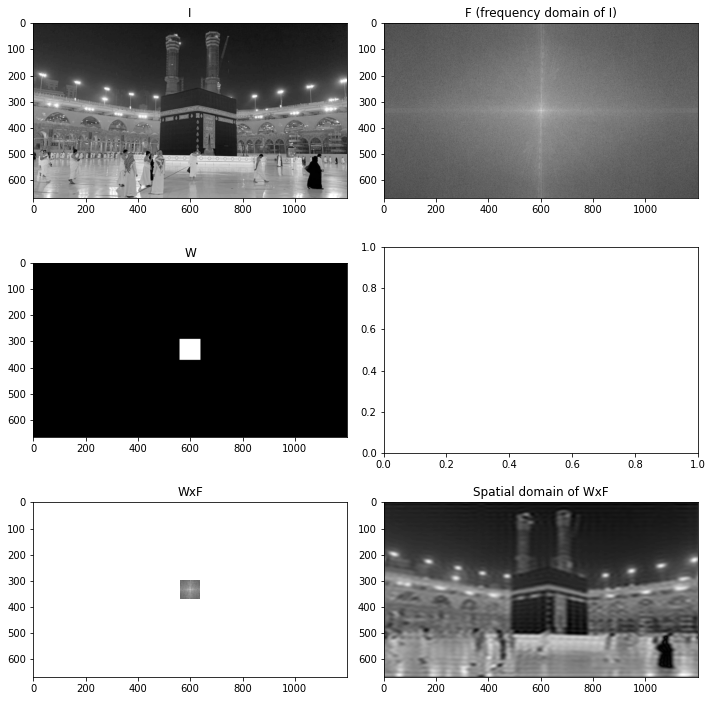

In [1]:
!wget -O Picture1.jpg https://images.indianexpress.com/2020/10/mecca.jpg

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read image I
img = cv2.imread('Picture1.jpg')
I = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Create W
size_w = 40
W = np.zeros((I.shape[0], I.shape[1]))
rows_2 = int(I.shape[0]/2)
cols_2 = int(I.shape[1]/2)
W[ rows_2-size_w:rows_2+size_w , cols_2-size_w:cols_2+size_w ] = np.ones((2*size_w,2*size_w))

# Step 2
temp = np.fft.fft2(I)
F = np.fft.fftshift(temp)  # zero frequency component (DC component) is on top left corner, bring it to center
magnitude_F = np.log(np.abs(F))

# Step 3
F_W = np.zeros((I.shape[0], I.shape[1]), dtype=complex)
rows_2 = int(I.shape[0]/2)
cols_2 = int(I.shape[1]/2)
F_W[ rows_2-size_w:rows_2+size_w , cols_2-size_w:cols_2+size_w ] = F[ rows_2-size_w:rows_2+size_w , cols_2-size_w:cols_2+size_w ]
magnitude_F_W = np.log(np.abs(F_W))

# Step 4
R1 = np.fft.ifft2(F_W)
magnitude_R1 = np.abs(R1)

# Visualize
fig, ax = plt.subplots(3,2, figsize=(10,10))

ax[0,0].title.set_text('I')
ax[0,0].imshow( I, cmap='gray' )

ax[0,1].title.set_text('F (frequency domain of I)')
ax[0,1].imshow( magnitude_F, cmap='gray' )

ax[1,0].title.set_text('W')
ax[1,0].imshow( W, cmap='gray' )

ax[2,0].title.set_text('WxF')
ax[2,0].imshow( magnitude_F_W, cmap='gray' )

ax[2,1].title.set_text('Spatial domain of WxF')
ax[2,1].imshow( magnitude_R1, cmap='gray' )
plt.tight_layout()

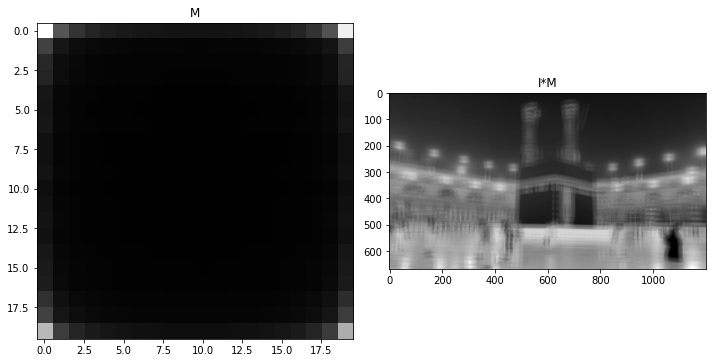

In [6]:
# Step 5
M = np.fft.ifft2(W)
magnitude_M = np.abs(M)
magnitude_M = cv2.resize(magnitude_M, (20,20))
magnitude_M = magnitude_M/sum(sum(magnitude_M))

# Step 6
R2 = cv2.filter2D(I, -1, kernel=magnitude_M)

# Visualize
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].title.set_text('M')
ax[0].imshow( magnitude_M, cmap='gray', vmin=0, vmax=np.max(magnitude_M) )
ax[1].title.set_text('I*M')
ax[1].imshow( R2, cmap='gray' )
plt.tight_layout()